<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from functools import partial

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

In [4]:
df.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


In [5]:
df.tail()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


In [6]:
df.isna().sum()

Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [7]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 44574 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44574 non-null  object
 1   ЗП                               44574 non-null  object
 2   Ищет работу на должность:        44574 non-null  object
 3   Город, переезд, командировки     44574 non-null  object
 4   Занятость                        44574 non-null  object
 5   График                           44574 non-null  object
 6   Опыт работы                      44574 non-null  object
 7   Последнее/нынешнее место работы  44574 non-null  object
 8   Последняя/нынешняя должность     44574 non-null  object
 9   Образование и ВУЗ                44574 non-null  object
 10  Обновление резюме                44574 non-null  object
 11  Авто                             44574 non-null  object
dtypes: object(12)
memory usage: 4.4+ MB


4. Обратите внимание на информацию о числе непустых значений.

In [8]:
???????????????

Object `?????????????` not found.


5. Выведите основную статистическую информацию о столбцах.


In [9]:
df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [10]:
education_kind = df['Образование и ВУЗ'].str.slice(0, 19)\
    .str.replace('Высшее образование ', 'Высшее')\
        .str.replace('Среднее образование', 'Среднее')

In [11]:
education_kind.unique()

array(['Неоконченное высшее', 'Высшее', 'Среднее специальное', 'Среднее'],
      dtype=object)

In [12]:
df['Образование'] = education_kind
df.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто,Образование
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано,Высшее
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано,Среднее специальное
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано,Высшее
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано,Высшее


In [13]:
#колхозыч-вариант
df['Образование и ВУЗ'].apply(lambda s: ' '.join(s.split(' ')[:2]) if s.split(' ')[1] == 'высшее ' or
                              s.split(' ')[1] == 'специальное' else s.split(' ')[0]).unique()

array(['Неоконченное', 'Высшее', 'Среднее специальное', 'Среднее'],
      dtype=object)

In [14]:
df[df['Образование'] == 'Среднее'].shape[0]

559

In [15]:
df = df.drop('Образование и ВУЗ', axis=1)

In [16]:
df.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,Высшее
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,Высшее


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [17]:
gender = df['Пол, возраст'].str.slice(0, 1)

In [18]:
gender.unique()

array(['М', 'Ж'], dtype=object)

In [19]:
df['Пол'] = gender
df.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,М
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее,М
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,Ж
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,Высшее,М
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,Высшее,Ж


In [20]:
#year of birth = pd.to_numeric(df['Пол, возраст'].str.slice(-1, -5, -1).str.slice(step=-1))
age = pd.to_numeric(df['Пол, возраст'].str.slice(11, 13))

In [21]:
age.unique()

array([39, 60, 36, 38, 26, 29, 46, 34, 35, 59, 27, 21, 31, 37, 30, 33, 42,
       32, 23, 28, 25, 24, 43, 53, 49, 44, 48, 54, 22, 20, 40, 62, 72, 45,
       41, 61, 50, 58, 57, 52, 56, 18, 19, 51, 16, 47, 71, 63, 55, 64, 68,
       17, 73, 66, 65, 77, 67, 69, 76, 70, 14, 15, 10], dtype=int64)

In [22]:
df['Возраст'] = age

In [23]:
100 * df['Пол'].value_counts(normalize=True).round(4)

Пол
М    80.93
Ж    19.07
Name: proportion, dtype: float64

In [24]:
df['Возраст'].mean().round(1)

32.2

In [25]:
df = df.drop('Пол, возраст', axis=1)

In [26]:
df.head()

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,М,39
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее,М,60
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,Ж,36
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,Высшее,М,38
4,140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,Высшее,Ж,26


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [27]:
def parse_experience(s):
    if s is np.nan:
        return s

    tokens, exp = s[12:29].split(' '), 0

    for i in range(1, len(tokens)):
        if 'лет' in tokens[i] or 'год' in tokens[i]:
            exp += np.int64(tokens[i - 1]) * 12
        if 'месяц' in tokens[i]:
            exp += np.int64(tokens[i - 1])

    if exp != 0:
        return exp

    return np.nan

In [28]:
df['Опыт работы (месяц)'] = df['Опыт работы'].apply(parse_experience)

In [29]:
df['Опыт работы (месяц)'].median()

100.0

In [30]:
df = df.drop('Опыт работы', axis=1)

In [31]:
df.head()

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц)
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,М,39,202.0
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее,М,60,233.0
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,Ж,36,123.0
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,Высшее,М,38,225.0
4,140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,Высшее,Ж,26,67.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [32]:
ZAMKADISHI_XO_XO = ('Новосибирск', 'Екатеринбург', 'Нижний Новгород',
                    'Казань', 'Челябинск', 'Омск',
                    'Самара', 'Ростов-на-Дону', 'Уфа',
                    'Красноярск', 'Пермь', 'Воронеж', 'Волгоград')

In [33]:
def parse_city(s):
    tokens = s.split(', ')

    if tokens[0].strip() == 'Москва' or tokens[0].strip() == 'Санкт-Петербург':
        return tokens[0].strip()
    elif tokens[0].strip() in ZAMKADISHI_XO_XO:
        return 'Город-миллионник'

    return 'Другие'

In [34]:
df['Город'] = df['Город, переезд, командировки'].apply(parse_city)

In [35]:
def parse_willings(s, relocation=True):
    tokens = s.split(', ')

    if relocation:
        if 'м.' in tokens[1]:
            token = tokens[2]
        else:
            token = tokens[1]
    else:
        token = tokens[-1]

    if 'не' in token:
        return False
    elif 'готов' in token or 'хочу' in token:
        return True

    return False

In [36]:
df['Готовность к переезду'] = df['Город, переезд, командировки'].apply(parse_willings)

In [37]:
df['Готовность к командировкам'] = df['Город, переезд, командировки'].apply(partial(parse_willings, relocation=False))

In [38]:
100 * df['Город'].value_counts(normalize=True)

Город
Москва              37.146880
Другие              35.432684
Город-миллионник    16.386555
Санкт-Петербург     11.033882
Name: proportion, dtype: float64

In [39]:
df = df.drop('Город, переезд, командировки', axis=1)

In [40]:
round(100 * (df['Готовность к переезду'] * df['Готовность к командировкам']).sum() / df.shape[0])

32

In [41]:
df.head()

,ЗП,Ищет работу на должность:,Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переезду,Готовность к командировкам
0,29000 руб.,Системный администратор,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,М,39,202.0,Другие,False,False
1,40000 руб.,Технический писатель,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее,М,60,233.0,Другие,False,True
2,20000 руб.,Оператор,полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,Ж,36,123.0,Другие,False,False
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,Высшее,М,38,225.0,Другие,False,True
4,140000 руб.,Региональный менеджер по продажам,полная занятость,полный день,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,Высшее,Ж,26,67.0,Москва,False,True


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [42]:
job_stuff = set()

for col in ('Занятость', 'График'):
    for s in df[col].str.split(', '):
        job_stuff |= set(s)

    for kind in job_stuff:
        df[kind.capitalize()] = df[col].apply(partial(lambda s, kind: kind in s, kind=kind))
    
    job_stuff.clear()

In [43]:
(df['Проектная работа'] * df['Волонтерство']).sum()

436

In [44]:
(df['Вахтовый метод'] * df['Гибкий график']).sum()

2311

In [45]:
df = df.drop(['Занятость', 'График'], axis=1)

In [46]:
df.head()

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,Проектная работа,Стажировка,Частичная занятость,Полная занятость,Волонтерство,Полный день,Гибкий график,Сменный график,Вахтовый метод,Удаленная работа
0,29000 руб.,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,М,39,202.0,...,True,False,True,True,False,True,True,True,True,True
1,40000 руб.,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее,М,60,233.0,...,True,False,True,True,False,True,True,True,False,True
2,20000 руб.,Оператор,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,Ж,36,123.0,...,False,False,False,True,False,True,False,False,False,False
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,Высшее,М,38,225.0,...,True,False,True,True,False,False,True,False,False,True
4,140000 руб.,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,Высшее,Ж,26,67.0,...,False,False,False,True,False,True,False,False,False,False


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [47]:
exchange_rates = pd.read_csv('data/ExchangeRates.csv', sep=',')

In [48]:
exchange_rates.head()

,currency,per,date,time,close,vol,proportion
0,USD,D,29/12/17,00:00,57.6291,0,1
1,USD,D,30/12/17,00:00,57.6002,0,1
2,USD,D,31/12/17,00:00,57.6002,0,1
3,USD,D,01/01/18,00:00,57.6002,0,1
4,USD,D,02/01/18,00:00,57.6002,0,1


In [49]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5664 entries, 0 to 5663
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   currency    5664 non-null   object 
 1   per         5664 non-null   object 
 2   date        5664 non-null   object 
 3   time        5664 non-null   object 
 4   close       5664 non-null   float64
 5   vol         5664 non-null   int64  
 6   proportion  5664 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 309.9+ KB


In [50]:
df['Обновление резюме'] = pd.to_datetime(pd.to_datetime(df['Обновление резюме'], dayfirst=True).dt.date)

In [51]:
exchange_rates['date'] = pd.to_datetime(exchange_rates['date'], format='%d/%m/%y')

In [52]:
df[['ЗП (руб.)', 'Валюта']] = df['ЗП'].str.split(' ', expand=True)
df['ЗП (руб.)'] = df['ЗП (руб.)'].astype('int64')

In [53]:
df['Валюта'].unique()

array(['руб.', 'бел.руб.', 'KZT', 'EUR', 'USD', 'грн.', 'сум', 'KGS',
       'AZN'], dtype=object)

In [54]:
ISO_exchange_codes = {'руб.': 'RUB', 'грн.': 'UAH', 'бел.руб.': 'BYN',
                      'сум': 'UZS', 'KZT': 'KZT', 'EUR': 'EUR',
                      'USD': 'USD', 'KGS': 'KGS', 'AZN': 'AZN'}

In [55]:
df['Валюта'] = df['Валюта'].apply(lambda s: ISO_exchange_codes[s])

In [56]:
df = df.merge(exchange_rates.drop(['per', 'time', 'vol'], axis=1), left_on=['Обновление резюме', 'Валюта'], right_on=['date', 'currency'], how='left')

In [57]:
df.head()

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,Гибкий график,Сменный график,Вахтовый метод,Удаленная работа,ЗП (руб.),Валюта,currency,date,close,proportion
0,29000 руб.,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,Неоконченное высшее,М,39,202.0,...,True,True,True,True,29000,RUB,NaN,NaT,NaN,NaN
1,40000 руб.,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-04-12,Не указано,Высшее,М,60,233.0,...,True,True,False,True,40000,RUB,NaN,NaT,NaN,NaN
2,20000 руб.,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,Среднее специальное,Ж,36,123.0,...,False,False,False,False,20000,RUB,NaN,NaT,NaN,NaN
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-04-08,Не указано,Высшее,М,38,225.0,...,True,False,False,True,100000,RUB,NaN,NaT,NaN,NaN
4,140000 руб.,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22,Не указано,Высшее,Ж,26,67.0,...,False,False,False,False,140000,RUB,NaN,NaT,NaN,NaN


In [58]:
df[['close', 'proportion']] = df[['close', 'proportion']].fillna(1)

In [59]:
df['ЗП (руб.)'] = df['ЗП (руб.)'] * df['close'] / df['proportion']

In [60]:
df['ЗП (руб.)'].median()

59019.0

In [61]:
df = df.drop(['ЗП', 'Валюта', 'currency', 'date', 'close', 'proportion'], axis=1)

In [62]:
df.head()

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,Стажировка,Частичная занятость,Полная занятость,Волонтерство,Полный день,Гибкий график,Сменный график,Вахтовый метод,Удаленная работа,ЗП (руб.)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,Неоконченное высшее,М,39,202.0,Другие,...,False,True,True,False,True,True,True,True,True,29000.0
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-04-12,Не указано,Высшее,М,60,233.0,Другие,...,False,True,True,False,True,True,True,False,True,40000.0
2,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,Среднее специальное,Ж,36,123.0,Другие,...,False,False,True,False,True,False,False,False,False,20000.0
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-04-08,Не указано,Высшее,М,38,225.0,Другие,...,False,True,True,False,False,True,False,False,True,100000.0
4,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22,Не указано,Высшее,Ж,26,67.0,Москва,...,False,False,True,False,True,False,False,False,False,140000.0


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [63]:
sns.set_style("whitegrid")

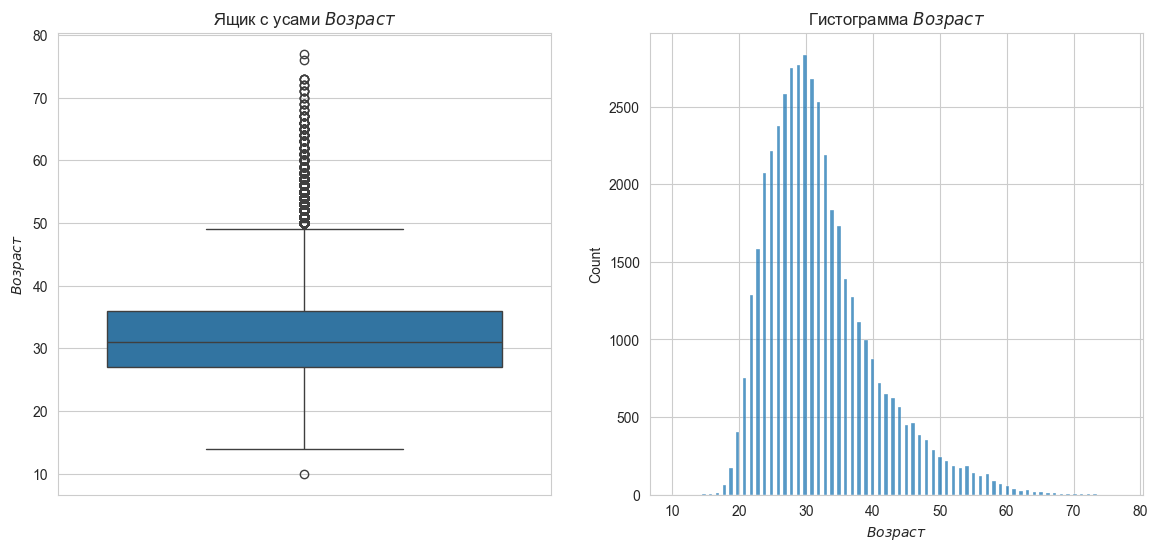

In [64]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(df['Возраст'])
plt.title('Ящик с усами $Возраст$')
plt.ylabel('$Возраст$')
plt.subplot(1, 2, 2)
sns.histplot(df['Возраст'])
plt.title('Гистограмма $Возраст$')
plt.xlabel('$Возраст$');

In [65]:
df['Возраст'].value_counts()

Возраст
30    2834
29    2765
28    2748
31    2675
27    2583
      ... 
15       2
77       1
76       1
14       1
10       1
Name: count, Length: 63, dtype: int64

In [66]:
df['Возраст'].min(), df['Возраст'].max()

(10, 77)

In [67]:
df[df['Возраст'] <= 20]['Возраст'].value_counts()

Возраст
20    405
19    173
18     61
17     14
16      4
15      2
14      1
10      1
Name: count, dtype: int64

In [68]:
df[df['Возраст'] >= 60]['Возраст'].value_counts()

Возраст
60    59
61    38
63    29
62    22
65    20
64    17
66    11
67     9
71     4
68     4
73     4
69     4
72     3
70     3
77     1
76     1
Name: count, dtype: int64

Мода распределения признака `Возраст` равняется $30$ годам. Возраст основного числа соискателей находится в диапазоне $20-45$ лет. Есть небольшое количество соискателей возрастом менее $18$ лет, ровно как и имеется малое число сосискателей возрастом более $60$ лет. Аномальными значениями возраста являются все значения менее $15$ лет (есть возможность официального трудоустройства только с $15$ лет во многих странах СНГ).

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

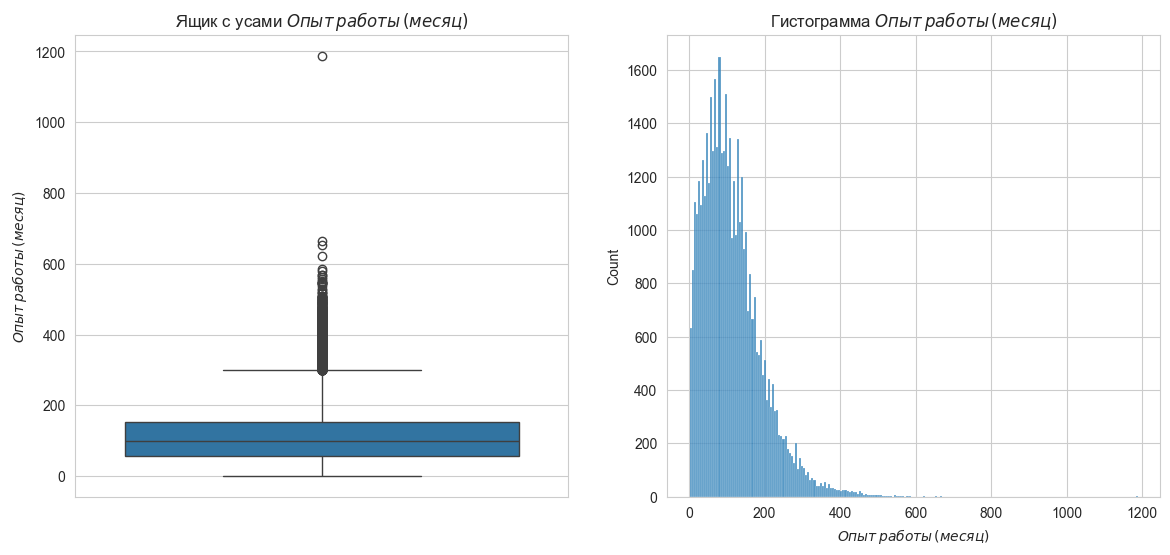

In [69]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(df['Опыт работы (месяц)'])
plt.title('Ящик с усами $Опыт\,работы\,(месяц)$')
plt.ylabel('$Опыт\,работы\,(месяц)$')
plt.subplot(1, 2, 2)
sns.histplot(df['Опыт работы (месяц)'])
plt.title('Гистограмма $Опыт\,работы\,(месяц)$')
plt.xlabel('$Опыт\,работы\,(месяц)$');

In [70]:
df['Опыт работы (месяц)'].value_counts()

Опыт работы (месяц)
81.0     313
68.0     306
80.0     286
92.0     286
64.0     285
        ... 
517.0      1
526.0      1
556.0      1
473.0      1
622.0      1
Name: count, Length: 517, dtype: int64

In [71]:
df['Опыт работы (месяц)'].min(), df['Опыт работы (месяц)'].max()

(1.0, 1188.0)

In [72]:
df[df['Опыт работы (месяц)'] <= 600]['Опыт работы (месяц)'].value_counts()

Опыт работы (месяц)
81.0     313
68.0     306
92.0     286
80.0     286
64.0     285
        ... 
526.0      1
556.0      1
473.0      1
479.0      1
496.0      1
Name: count, Length: 513, dtype: int64

In [73]:
df[df['Опыт работы (месяц)'] <= 12]['Опыт работы (месяц)'].value_counts()

Опыт работы (месяц)
9.0     187
11.0    185
8.0     175
6.0     153
12.0    153
7.0     152
10.0    151
5.0     141
4.0     135
3.0     111
2.0      73
1.0      21
Name: count, dtype: int64

In [74]:
df[df['Опыт работы (месяц)'] >= 12. * (df['Возраст'] - 15)].shape[0]

167

Мода распределения признака `Опыт работы (месяц)` равняется $81$ месяц. Максимальное значение опыта работы равняется $1188$ месяцев. Возраст основного числа соискателей находится в диапазоне $1-600$ месяцев. Есть небольшое количество соискателей возрастом с опытом работы более $600$ месяцев. Аномальными значениями опыта работы являются все те значения, которые превышают возраст соответствующего соискателя за вычетом $15$ лет (есть возможность официального трудоустройства с этого возраста во многих странах СНГ). Таких резюме 167 штук.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


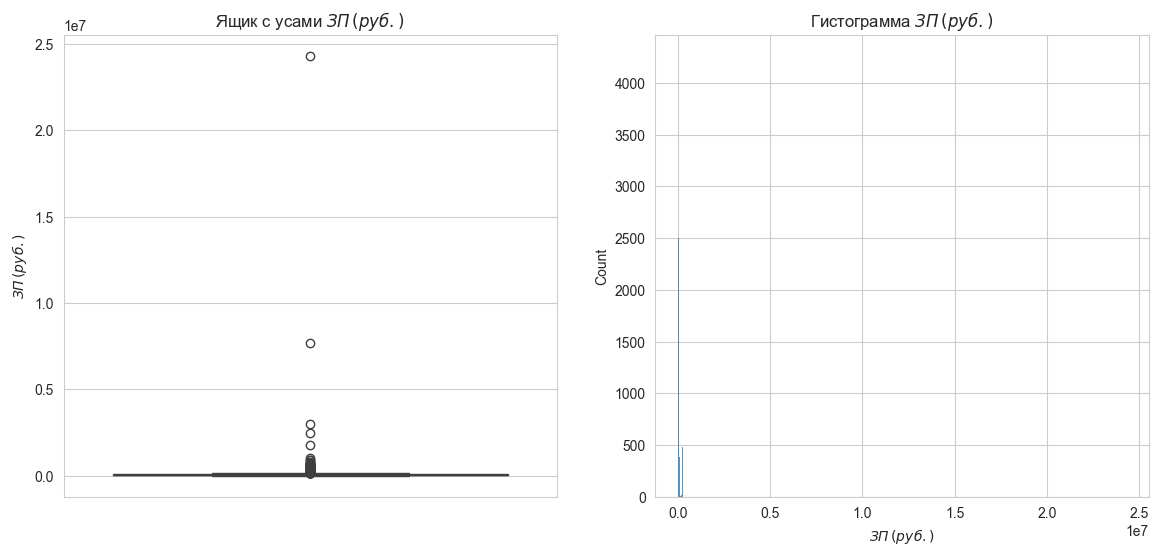

In [75]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(df['ЗП (руб.)'])
plt.title('Ящик с усами $ЗП\,(руб.)$')
plt.ylabel('$ЗП\,(руб.)$')
plt.subplot(1, 2, 2)
sns.histplot(df['ЗП (руб.)'])
plt.title('Гистограмма $ЗП\,(руб.)$')
plt.xlabel('$ЗП\,(руб.)$');

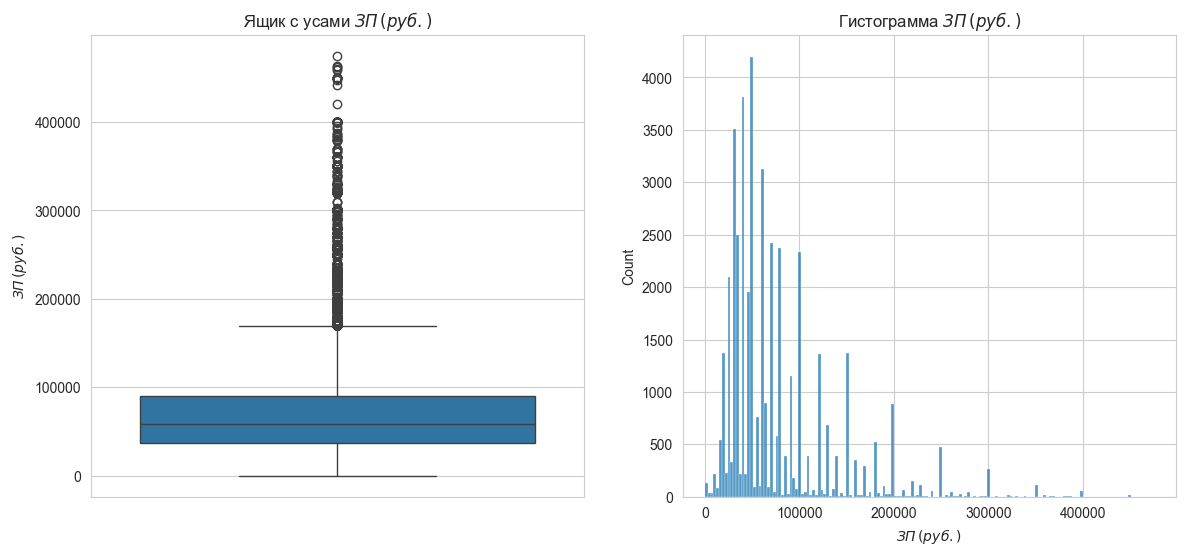

In [76]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(df[df['ЗП (руб.)'] < 500_000]['ЗП (руб.)'])
plt.title('Ящик с усами $ЗП\,(руб.)$')
plt.ylabel('$ЗП\,(руб.)$')
plt.subplot(1, 2, 2)
sns.histplot(df[df['ЗП (руб.)'] < 500_000]['ЗП (руб.)'])
plt.title('Гистограмма $ЗП\,(руб.)$')
plt.xlabel('$ЗП\,(руб.)$');

In [77]:
df['ЗП (руб.)'].min(), df['ЗП (руб.)'].max()

(1.0, 24304876.0)

In [78]:
df[df['ЗП (руб.)'] > 1_000_000]['ЗП (руб.)'].shape[0], df[df['ЗП (руб.)'] < 1_000]['ЗП (руб.)'].shape[0]

(5, 84)

In [79]:
df['ЗП (руб.)'].value_counts()

ЗП (руб.)
50000.00     4064
40000.00     3762
30000.00     3264
60000.00     3087
70000.00     2388
             ... 
280.00          1
999.00          1
64386.36        1
900.00          1
101686.65       1
Name: count, Length: 1115, dtype: int64

In [80]:
df[df['ЗП (руб.)'] <= 20_000]['ЗП (руб.)'].value_counts()

ЗП (руб.)
20000.0000    1148
15000.0000     340
10000.0000     184
18000.0000      95
16868.0000      46
              ... 
15200.0000       1
16169.8500       1
55.0000          1
167.0000         1
19339.1406       1
Name: count, Length: 167, dtype: int64

In [81]:
df[df['ЗП (руб.)'] >= 400_000]['ЗП (руб.)'].value_counts()

ЗП (руб.)
4.000000e+05    56
5.000000e+05    21
4.500000e+05    11
6.000000e+05     4
7.000000e+05     3
5.800000e+05     2
5.120000e+05     2
3.000000e+06     1
7.500000e+05     1
5.601414e+05     1
5.116816e+05     1
1.000000e+06     1
9.239830e+05     1
4.496954e+05     1
4.750000e+05     1
4.600000e+05     1
4.617522e+05     1
4.619384e+05     1
7.675224e+06     1
4.420389e+05     1
1.750000e+06     1
6.074050e+05     1
4.476150e+05     1
4.592010e+05     1
5.827184e+05     1
4.200000e+05     1
9.000000e+05     1
6.320120e+05     1
7.366535e+05     1
8.000000e+05     1
5.178984e+05     1
6.500000e+05     1
4.632630e+05     1
2.430488e+07     1
6.531010e+05     1
6.451710e+05     1
6.396020e+05     1
2.500000e+06     1
Name: count, dtype: int64

Мода распределения признака `ЗП (руб.)` равняется $50000$ руб. Максимальное значение заработной платы равняется $24304876$ руб., минимальное - $1$ руб. Значение заработной платы для основной массы соискателей лежит в диапазоне $30000-400000$ руб. Есть небольшое количество соискателей с значениями заработной платы более $1000000$ руб. Выбросами в значениях уровня заработной платы  являются все значения ниже МРОТ (т.е. менее $20000$ руб.).

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

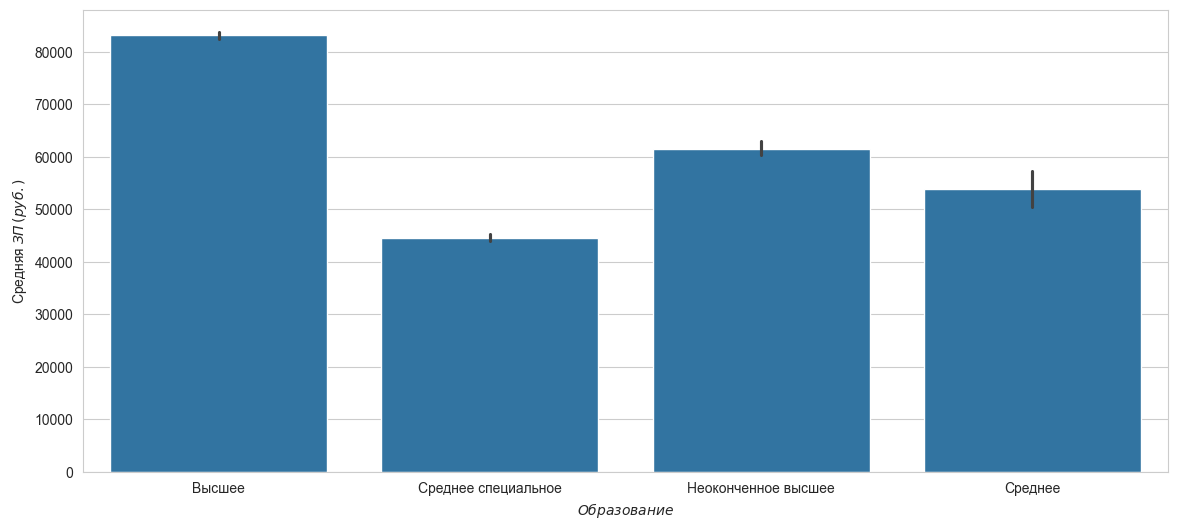

In [82]:
temp = df[df['ЗП (руб.)'] < 1_000_000][['ЗП (руб.)', 'Образование']].sort_values('ЗП (руб.)')

plt.figure(figsize=(14, 6))
sns.barplot(temp, x='Образование', y='ЗП (руб.)')
plt.xlabel('$Образование$')
plt.ylabel('Средняя $ЗП\,(руб.)$');

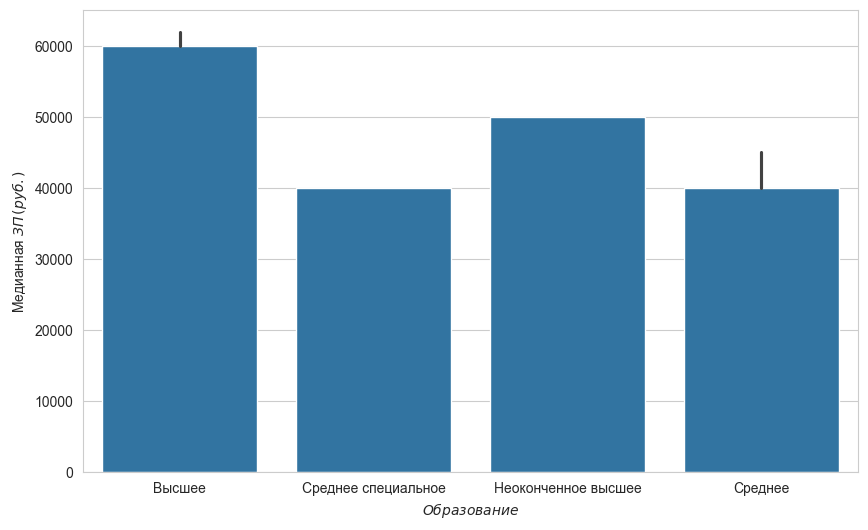

In [83]:
plt.figure(figsize=(10, 6))
sns.barplot(temp, x='Образование', y='ЗП (руб.)', estimator='median')
plt.xlabel('$Образование$')
plt.ylabel('Медианная $ЗП\,(руб.)$');

Для категорий признака `Образование` 'Высшее' и 'Среднее'/'Среднее специальное' наблюдаются наибольшее и наименьшее значения медианной ожидаемой заработной платы соответственно. Признак `Образование` является важным признаком для предсказания значений признака `ЗП (руб.)`, т.к. из диаграммы отчетливо виден тренд на увеличение медианной ожидаемой заработной платы в зависимости от увеличения уровня образования.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

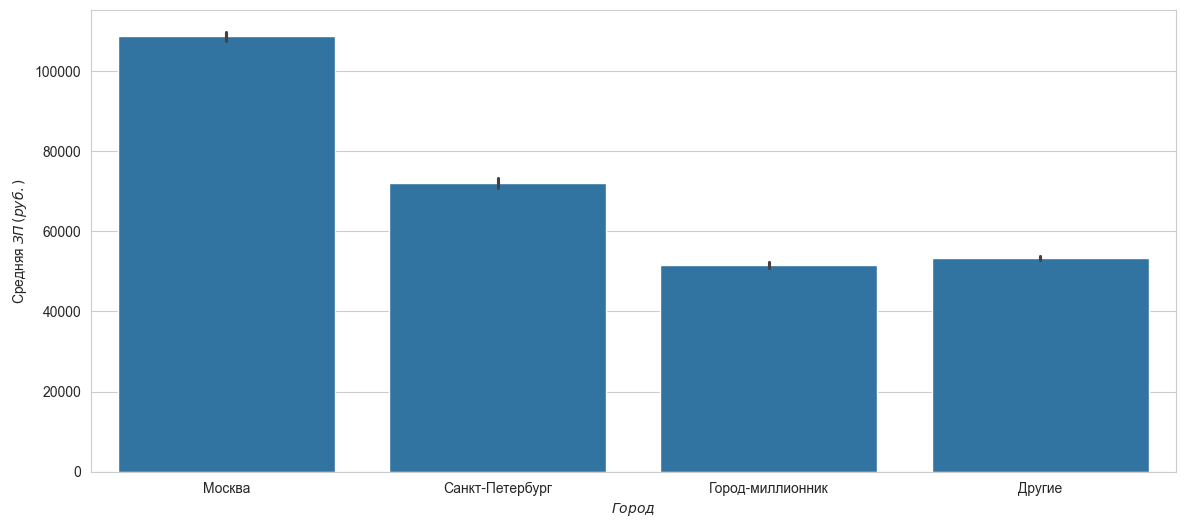

In [84]:
temp = df[df['ЗП (руб.)'] < 1_000_000][['ЗП (руб.)', 'Город']].sort_values('ЗП (руб.)')

plt.figure(figsize=(14, 6))
sns.barplot(temp, x='Город', y='ЗП (руб.)')
plt.xlabel('$Город$')
plt.ylabel('Средняя $ЗП\,(руб.)$');

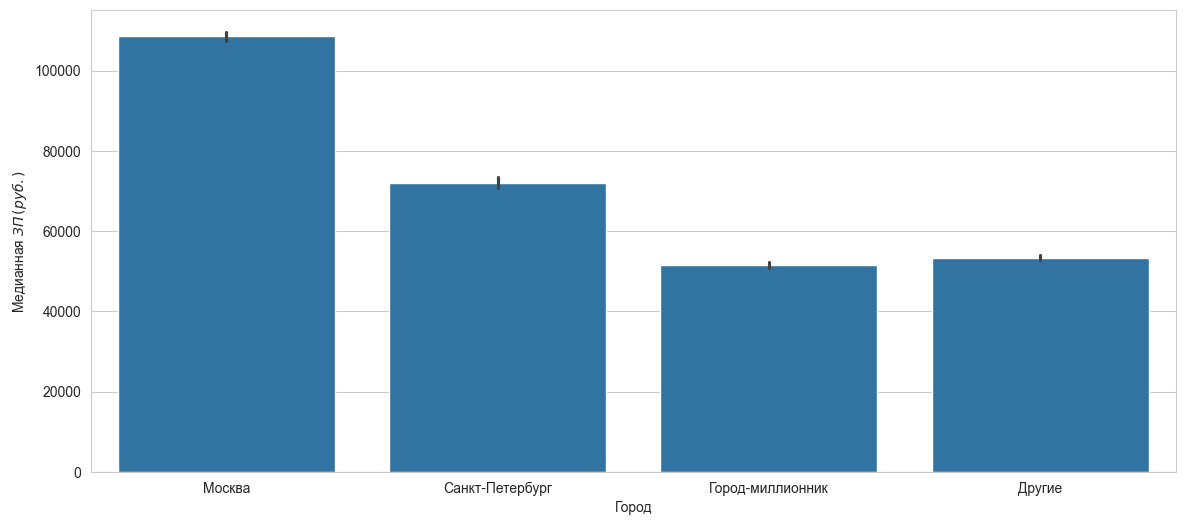

In [85]:
plt.figure(figsize=(14, 6))
sns.barplot(temp, x='Город', y='ЗП (руб.)')
plt.ylabel('Медианная $ЗП\,(руб.)$');

In [86]:
temp = temp.sort_values('ЗП (руб.)')
temp[temp['ЗП (руб.)'] > 20_000]

,ЗП (руб.),Город
27632,20241.6,Другие
6524,20241.6,Другие
41754,20241.6,Другие
11808,20241.6,Другие
33760,20241.6,Другие
...,...,...
13337,736653.5,Москва
28580,750000.0,Москва
12725,800000.0,Москва
15836,900000.0,Москва


Для категорий признака `Город` 'Москва' и 'Город миллионник'/'Другие' наблюдаются наибольшее и наименьшее значения медианной ожидаемой заработной платы соответственно. Признак `Город` является важным признаком для предсказания значений признака `ЗП (руб.)`, т.к. из диаграммы отчетливо виден тренд на увеличение медианной ожидаемой заработной платы в зависимости от города: для городов с более высоким уровнем жизни характерны и более высокие значения ожидаемой заработной платы. Как минимальное так и максимальное значения ожидаемой заработной платы характерно для категории 'Другие'.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

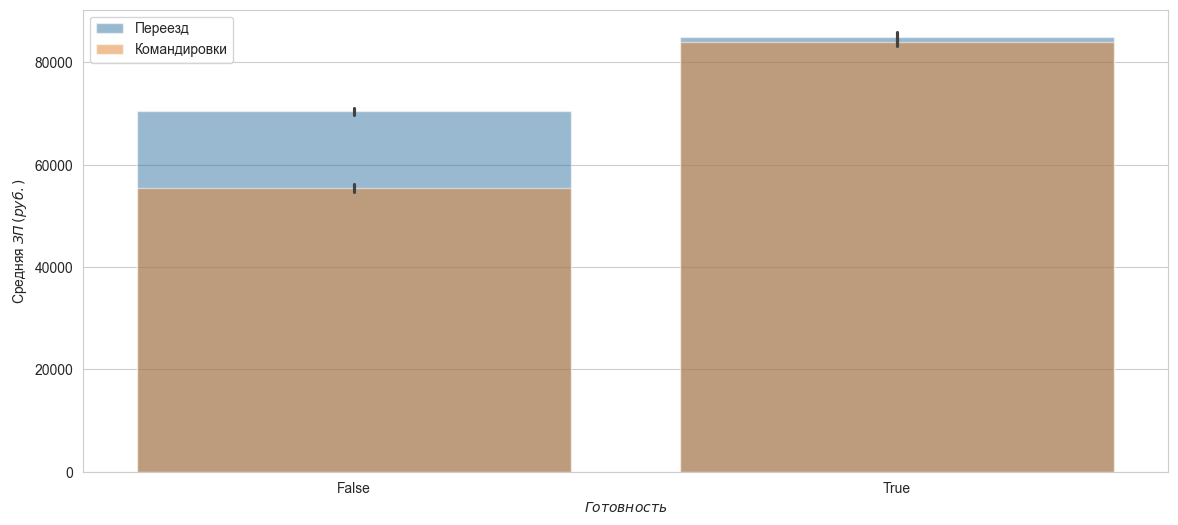

In [87]:
temp = df[df['ЗП (руб.)'] < 1_000_000][['ЗП (руб.)', 'Готовность к переезду', 'Готовность к командировкам']].sort_values('ЗП (руб.)')

plt.figure(figsize=(14, 6))
sns.barplot(temp, x='Готовность к переезду', y='ЗП (руб.)', label='Переезд', alpha=0.5)
sns.barplot(temp, x='Готовность к командировкам', y='ЗП (руб.)', label='Командировки', alpha=0.5)
plt.xlabel('$Готовность$')
plt.ylabel('Средняя $ЗП\,(руб.)$');

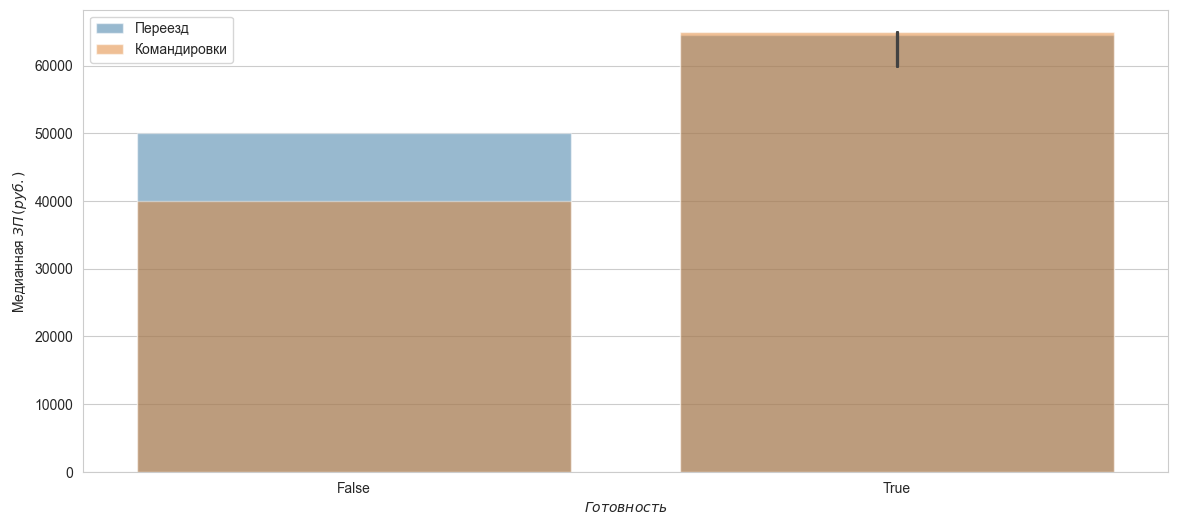

In [88]:
plt.figure(figsize=(14, 6))
sns.barplot(temp, x='Готовность к переезду', y='ЗП (руб.)', label='Переезд', estimator='median', alpha=0.5)
sns.barplot(temp, x='Готовность к командировкам', y='ЗП (руб.)', label='Командировки', estimator='median', alpha=0.5)
plt.xlabel('$Готовность$')
plt.ylabel('Медианная $ЗП\,(руб.)$');

In [89]:
temp[temp['Готовность к переезду'] & temp['Готовность к командировкам']]['ЗП (руб.)'].median()

66000.0

Медианное значение ожидаемого размера заработной платы для тех, кто не готов ни к командировкам ни к переезду, выше для тех, кто не готов к переезду. Для тех же, кто готов и к переезду и к командировкам, существенной разницы в медианном значении ожидаемого размера заработной платы не наблюдается (у тех, кто готов к командировкам, он лишь немногим выше, чем у тех, кто не готов). Также для каждого из признаков `Готовность к переезду` и `Готовность к командировкам` медианное значение заработной платы выше для тех, кто готов по каждому из признаков.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

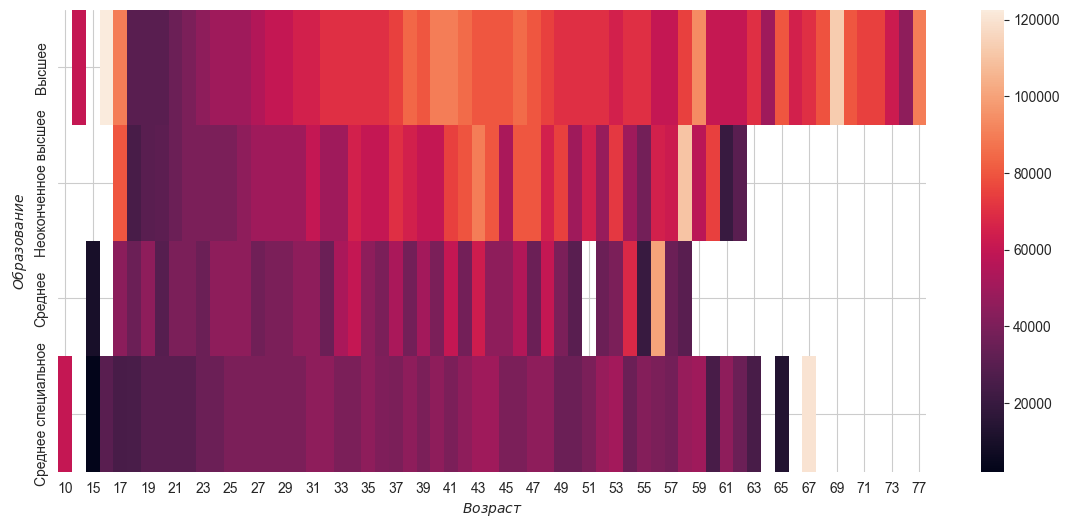

In [90]:
plt.figure(figsize=(14, 6))
sns.heatmap(pd.pivot_table(df, values='ЗП (руб.)', index='Образование', columns='Возраст', aggfunc='median'))
plt.xlabel('$Возраст$')
plt.ylabel('$Образование$');

Наибольшими значениями заработной платы обладают соискатели с высшим и неоконченным высшим образованием. Для соискателей, имеющих среднее или среднее специальное образование, характерный диапазон заработных плат приблизительно одинаков ($20000-60000$ руб.). Для соискателей, имеющих высшее или неоконченное высшее образование, диапазон заработных плат шире, нежели у прочих групп. Наивысшие зарплатные ожидания в группах 'Высшее' и 'Неоконченное высшее' в возрастной группе $35-53$ года. Для прочих групп ('Среднее' и 'Неоконченное среднее') наивысшие зарплатные ожидания в возрастных группах $39-45$ лет.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

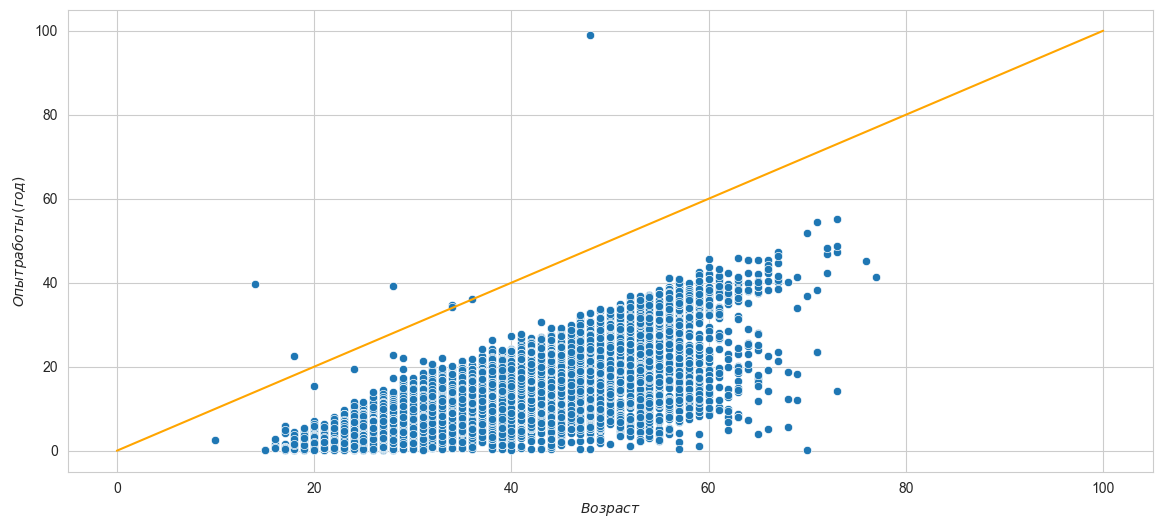

In [91]:
df['Опыт работы (год)'] = (df['Опыт работы (месяц)'] / 12.).round(2)

plt.figure(figsize=(14, 6))
sns.scatterplot(df, x='Возраст', y='Опыт работы (год)')
plt.plot([0, 100], [0, 100], color='orange')
plt.xlabel('$Возраст$')
plt.ylabel('$Опыт работы\,(год)$');

In [92]:
df[df['Опыт работы (год)'] > df['Возраст']].shape[0]

7

Имеется 7 аномальных значений признака `Опыт работы `.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


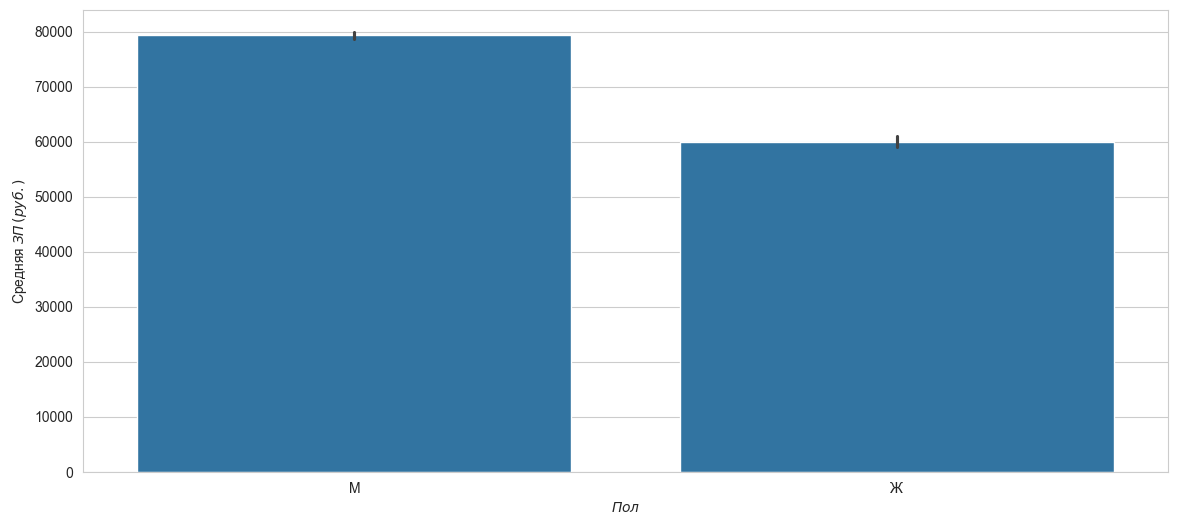

In [94]:
temp = df[df['ЗП (руб.)'] < 1_000_000][['ЗП (руб.)', 'Пол']].sort_values('ЗП (руб.)')

plt.figure(figsize=(14, 6))
sns.barplot(temp, x='Пол', y='ЗП (руб.)')
plt.xlabel('$Пол$')
plt.ylabel('Средняя $ЗП\,(руб.)$');

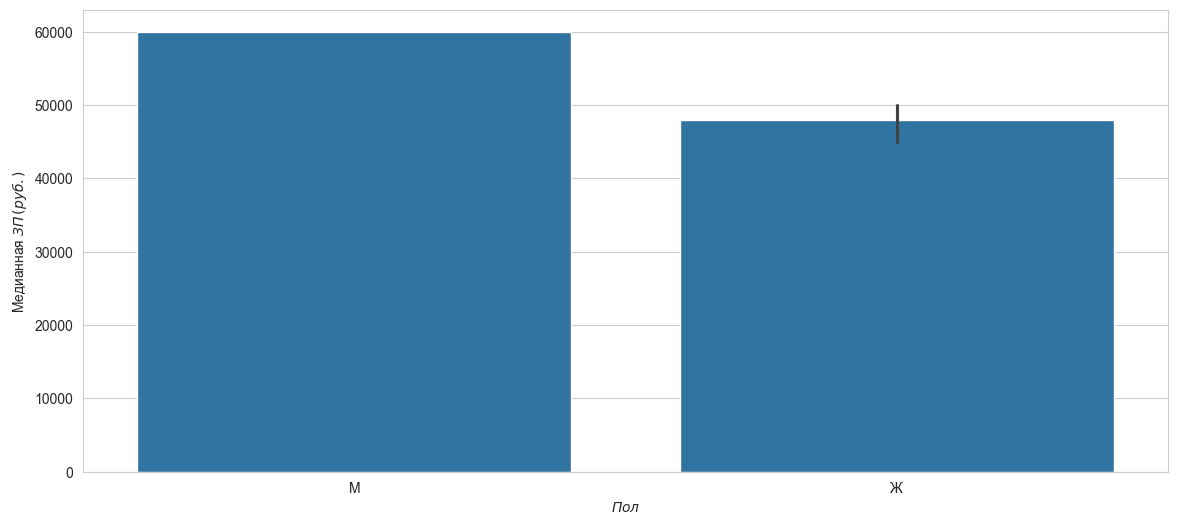

In [95]:
plt.figure(figsize=(14, 6))
sns.barplot(temp, x='Пол', y='ЗП (руб.)', estimator='median')
plt.xlabel('$Пол$')
plt.ylabel('Медианная $ЗП\,(руб.)$');

Можно наблюдать, что есть существенная разница в размере медианных и средних значений ожидаемых заработных плат для мужчин и женщин.

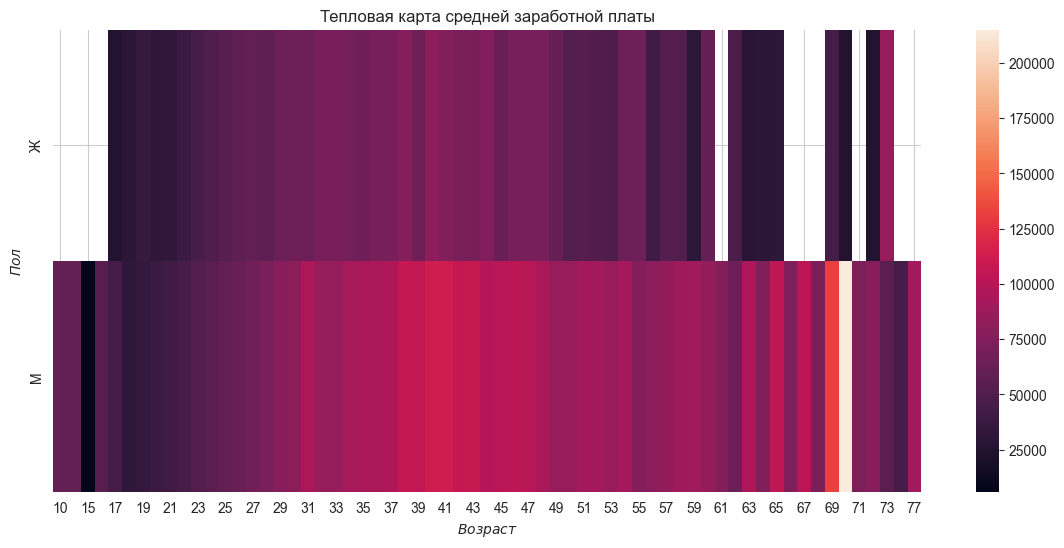

In [96]:
plt.figure(figsize=(14, 6))
sns.heatmap(pd.pivot_table(df, values='ЗП (руб.)', index='Пол', columns='Возраст'))
plt.title('Тепловая карта средней заработной платы')
plt.xlabel('$Возраст$')
plt.ylabel('$Пол$');

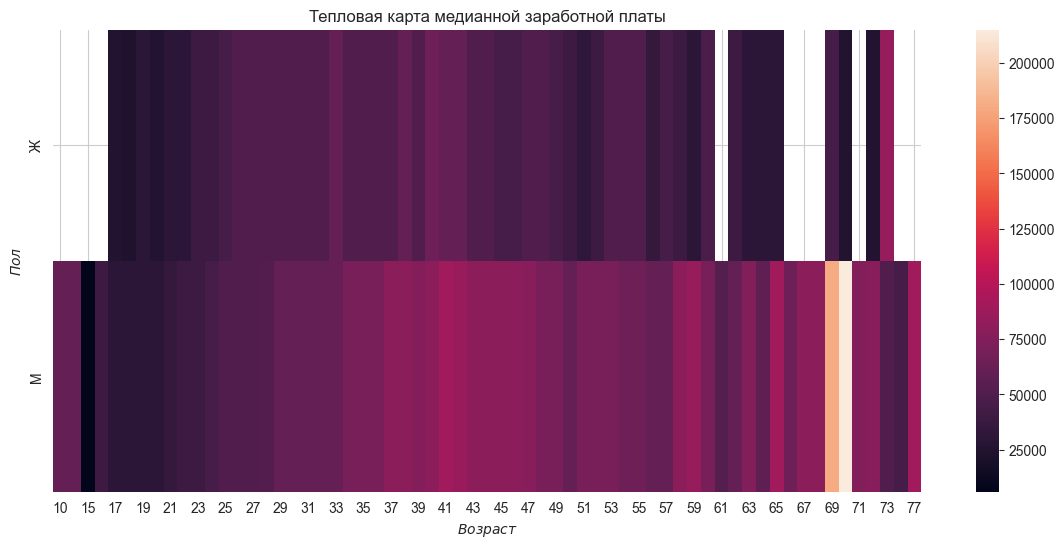

In [97]:
plt.figure(figsize=(14, 6))
sns.heatmap(pd.pivot_table(df, values='ЗП (руб.)', index='Пол', columns='Возраст', aggfunc='median'))
plt.title('Тепловая карта медианной заработной платы')
plt.xlabel('$Возраст$')
plt.ylabel('$Пол$');

Для мужчин наблюдается самый быстрый рост средней и медианной ожидаемых заработных плат. В старшей возрастной категории (от $60$ лет) у мужчин также наблюдаются большие значения что медианной, что средней заработной платы.

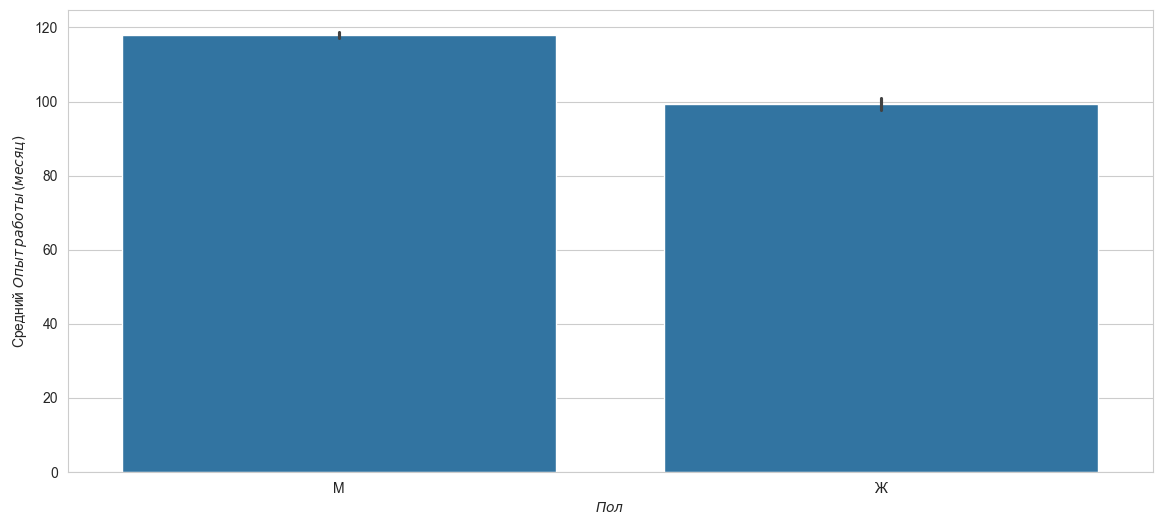

In [98]:
plt.figure(figsize=(14, 6))
sns.barplot(df, x='Пол', y='Опыт работы (месяц)')
plt.xlabel('$Пол$')
plt.ylabel('Средний $Опыт\,работы\,(месяц)$');

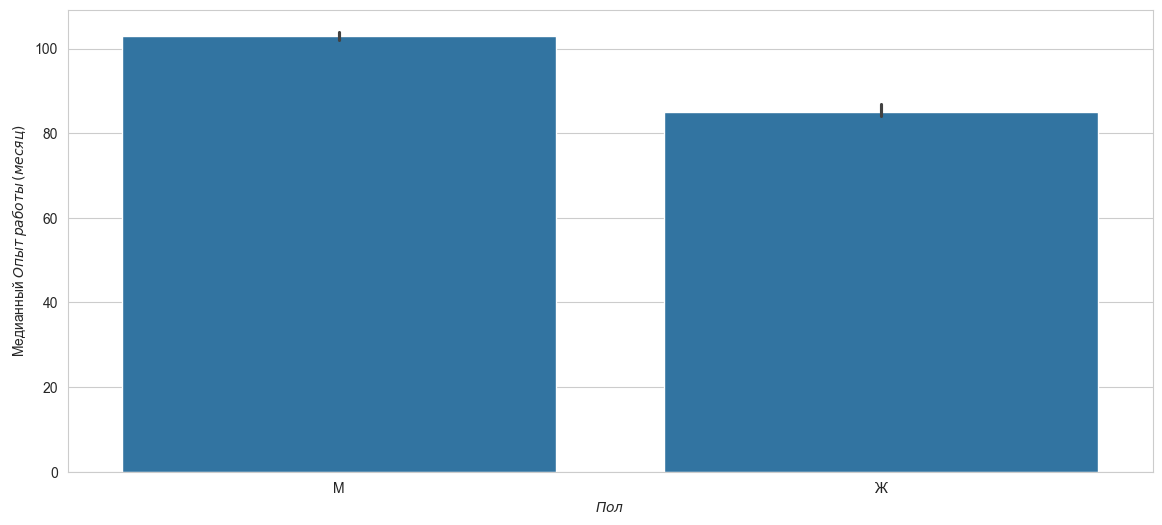

In [99]:
plt.figure(figsize=(14, 6))
sns.barplot(df, x='Пол', y='Опыт работы (месяц)', estimator='median')
plt.xlabel('$Пол$')
plt.ylabel('Медианный $Опыт\,работы\,(месяц)$');

Для мужчин характерен более длительный стаж работы.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [100]:
df.duplicated().sum()

161

In [101]:
df = df.drop_duplicates()

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [102]:
df.isna().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
Проектная работа                     0
Стажировка                           0
Частичная занятость                  0
Полная занятость                     0
Волонтерство                         0
Полный день                          0
Гибкий график                        0
Сменный график                       0
Вахтовый метод                       0
Удаленная работа                     0
ЗП (руб.)                            0
Опыт работы (год)                  168
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [103]:
median_exp = df['Опыт работы (месяц)'].median()
df['Опыт работы (месяц)'] = df['Опыт работы (месяц)'].fillna(median_exp)

In [104]:
df = df.dropna()

In [105]:
df['Опыт работы (месяц)'].mean()

114.41208655123499

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [106]:
# 89 до удаления дубликатов и пропусков, и это правильный ответ 0___0
df[(df['ЗП (руб.)'] > 1_000_000) | (df['ЗП (руб.)'] < 1_000)].shape[0]

87

In [107]:
df = df[(df['ЗП (руб.)'] <= 1_000_000) & (df['ЗП (руб.)'] >= 1_000)]

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [108]:
df = df[df['Опыт работы (год)'] <= df['Возраст']]

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

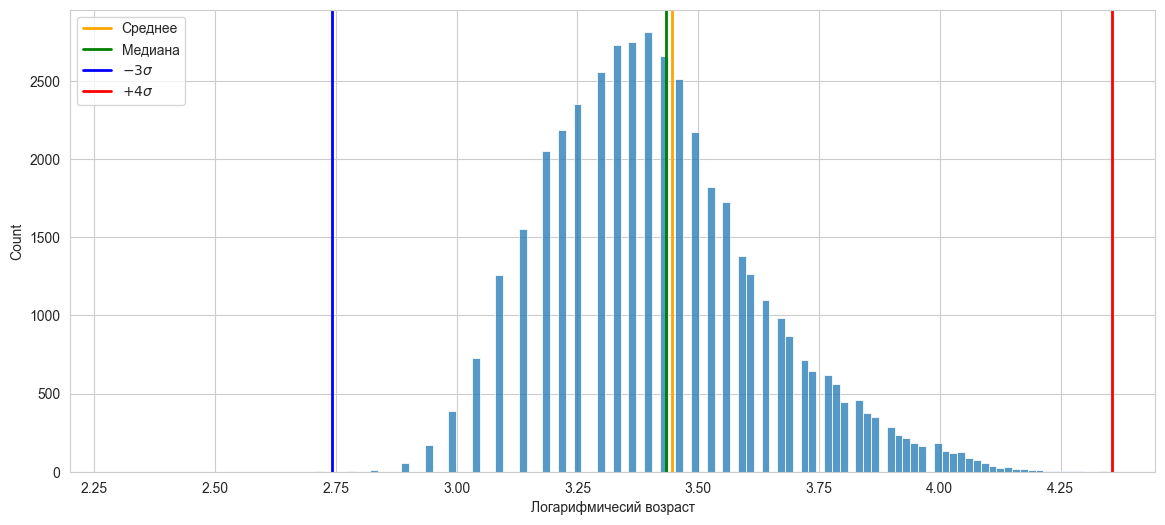

In [109]:
log_age = np.log(df['Возраст'])
left, right = log_age.median() - 3 * log_age.std(), log_age.median() + 4 * log_age.std()

plt.figure(figsize=(14, 6))
sns.histplot(log_age)
plt.axvline(log_age.mean(), color='orange', lw=2)
plt.axvline(log_age.median(), color='green', lw=2)
plt.axvline(left, color='blue', lw=2)
plt.axvline(right, color='red', lw=2)
plt.legend(['Среднее', 'Медиана', '$-3\sigma$', '$+4\sigma$'], loc='upper left')
plt.xlabel('Логарифмичесий возраст');

In [110]:
df[(np.log(df['Возраст']) < left) | (np.log(df['Возраст']) > right)]['Возраст'].sort_values().shape[0]

3

Распределение возраста не является симметричным: мода смещена в левую сторону от медианы. За интервалом $3\sigma$ оказываются все возрастные категории начиная с $62$ лет.